In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Airfare_Prediction.csv')
df=df.dropna()
df



,Year,Quarter,Origin,Destination,Distance,Average Fare,carrier_lg,carrier_low
0,1996,3,"Charlotte, NC","Pittsburgh, PA",366,244.04,US,DL
1,1996,4,"Minneapolis/St. Paul, MN","Seattle, WA",1399,196.84,NW,F9
2,1996,2,"Albany, NY","Washington, DC (Metropolitan Area)",325,194.06,US,AA
3,1996,2,"Milwaukee, WI","Phoenix, AZ",1460,149.49,HP,TZ
4,1996,2,"Birmingham, AL","Miami, FL (Metropolitan Area)",661,140.64,DL,WN
...,...,...,...,...,...,...,...,...
102025,2021,2,"Syracuse, NY","Tampa, FL (Metropolitan Area)",1111,160.47,G4,G4
102026,2021,2,"Knoxville, TN","New York City, NY (Metropolitan Area)",684,201.60,G4,G4
102027,2021,2,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,130.13,G4,G4
102028,2021,2,"Knoxville, TN","Tampa, FL (Metropolitan Area)",550,108.25,G4,G4


Text(0.5, 1.0, '5 Major Carriers and their average fares')

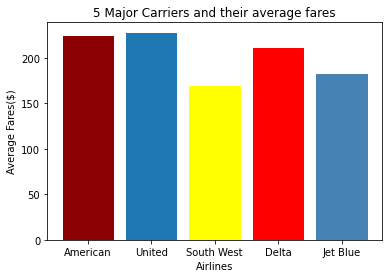

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# major_airlines=df.where(=='DL'or df['carrier_lg']=='AA'or df['carrier_lg']=='UA'or df['carrier_lg']=='WN']
aa_average=df.where(df['carrier_lg']=='AA').mean()['Average Fare']
ua_average=df.where(df['carrier_lg']=='UA').mean()['Average Fare']
sw_average=df.where(df['carrier_lg']=='WN').mean()['Average Fare']
dl_average=df.where(df['carrier_lg']=='DL').mean()['Average Fare']
jb_average=df.where(df['carrier_lg']=='B6').mean()['Average Fare']

Airlines =['American','United','South West','Delta',"Jet Blue"]
pos = np.arange(len(Airlines))
avg_fares = [aa_average,ua_average,sw_average,dl_average,jb_average]

bars=plt.bar(pos, avg_fares, align='center')
bars[0].set_color('darkred')
bars[2].set_color('yellow')
bars[3].set_color('red')
bars[4].set_color('steelblue')
plt.xticks(pos, Airlines)
plt.xlabel('Airlines')
plt.ylabel('Average Fares($)')
plt.title('5 Major Carriers and their average fares')


# plt.plot(df['Distance'],df['Average Fare'])







































In [6]:
df['Origin'].value_counts()[:10].sort_values(ascending=False)

Atlanta, GA (Metropolitan Area)        5901
Chicago, IL                            5688
Dallas/Fort Worth, TX                  5175
Boston, MA (Metropolitan Area)         4976
Denver, CO                             4129
Houston, TX                            3663
Las Vegas, NV                          3555
Los Angeles, CA (Metropolitan Area)    3510
Detroit, MI                            3036
Charlotte, NC                          2962
Name: Origin, dtype: int64

In [5]:
atl_average=df.where(df['Origin']=='Atlanta, GA (Metropolitan Area)').mean()['Average Fare']
ord_average=df.where(df['Origin']=='Chicago, IL' ).mean()['Average Fare']
dfw_average=df.where(df['Origin']=='Dallas/Fort Worth, TX').mean()['Average Fare']
bos_average=df.where(df['Origin']=='Boston, MA (Metropolitan Area)').mean()['Average Fare']
lax_average=df.where(df['Origin']=='Los Angeles, CA (Metropolitan Area)').mean()['Average Fare']
lax_average

209.6027293447296

IndexError: list index out of range

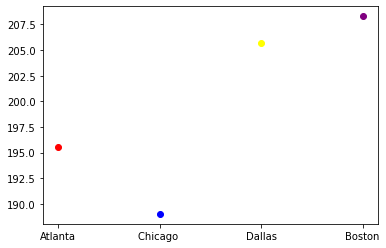

In [8]:
Origin =['Atlanta','Chicago ','Dallas','Boston','Denver']
pos = np.arange(len(Origin))
origin_fares = [atl_average,ord_average,dfw_average,bos_average]
plt.scatter(Origin[0],origin_fares[0],color='red')
plt.scatter(Origin[1],origin_fares[1],color='blue')
plt.scatter(Origin[2],origin_fares[2],color='yellow')
plt.scatter(Origin[3],origin_fares[3],color='purple')
plt.scatter(Origin[4],origin_fares[4],color='brown')
plt.xlabel('Origin Airports')
plt.ylabel('Average Fares($)')
plt.title('4 Major Airports and Their Average Fares')





In [20]:
q1_average=df.where(df['Quarter']==1).mean()['Average Fare']
q2_average=df.where(df['Quarter']==2).mean()['Average Fare']
q3_average=df.where(df['Quarter']==3).mean()['Average Fare']
q4_average=df.where(df['Quarter']==4).mean()['Average Fare']


Text(0.5, 1.0, 'Average Fares in every Quarter')

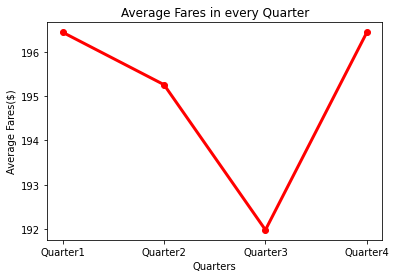

In [23]:
Quarters =['Quarter1','Quarter2','Quarter3','Quarter4']
pos = np.arange(len(Quarters))
quarter_fares = [q1_average,q2_average,q3_average,q4_average]
plt.plot(Quarters,quarter_fares,'-o',color='red',linewidth=3)

plt.xlabel('Quarters')
plt.ylabel('Average Fares($)')
plt.title('Average Fares in every Quarter')

Text(0.5, 1.0, 'Flying Distance vs Average Fares')

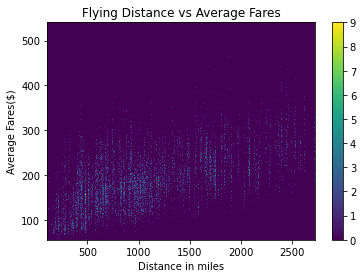

In [28]:
plt.figure()
plt.hist2d(df['Distance'],df['Average Fare'],bins=1000)
plt.colorbar()
plt.xlabel('Distance in miles')
plt.ylabel('Average Fares($)')
plt.title('Flying Distance vs Average Fares')


In [2]:
# Flight fare prediction
df.corr()

NameError: name 'df' is not defined

In [8]:
# Encoding categorical values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# df=df.drop(['Average Fare'],axis=1)
data_categorical=df.select_dtypes(exclude=["int64","float","int32"])
data_numerical=df.select_dtypes(include=["int64","float","int32"])
data_categorical=data_categorical[['Origin','Destination']]
data_categorical=data_categorical.apply(le.fit_transform)


In [9]:
data_categorical
data_numerical=data_numerical[['Year','Quarter','Distance']]
x=pd.concat([data_categorical,data_numerical],axis=1)
y=df['Average Fare']
data_categorical


,Origin,Destination
0,28,86
1,94,113
2,0,133
3,93,85
4,17,61
...,...,...
102025,141,126
102026,78,73
102027,78,61
102028,78,126


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
 X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
random_forest=RandomForestRegressor(n_estimators=100,max_depth=40).fit(X_train,y_train)
print('Training R2 score: {}'.format(random_forest.score(X_train,y_train)))
print('Testing R2 score: {}'.format(random_forest.score(X_test,y_test)))




Training R2 score: 0.9900722258288731
Testing R2 score: 0.9283567739773287


[0.5 1.5 2.5 3.5 4.5]


Text(0.5, 1.0, 'Feature Importance(Random Forest Regressor)')

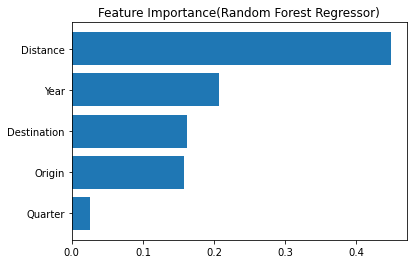

In [95]:
feature_importance = random_forest.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos)
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance(Random Forest Regressor)')